In [5]:
import warnings
warnings.simplefilter('ignore')

from complexity_analysis import plot_S_K_experiment

## Developing plots for complexity paper

There seems to be a lot of noise in the averages and even medians, as shown below.

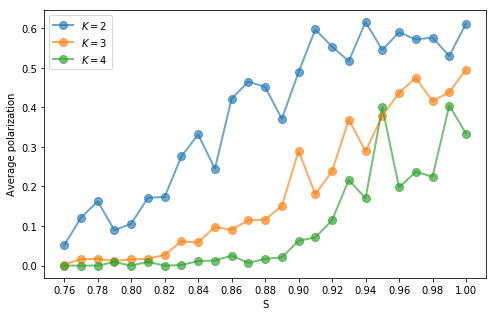

In [39]:
plot_S_K_experiment('data/ic_k234', figsize=(7, 4.5), plot_start=1)
plt.xticks(plt.xticks()[0][::2], 
           ['{:.2f}'.format(el) for el in np.arange(.76, 1.03, .02)]);

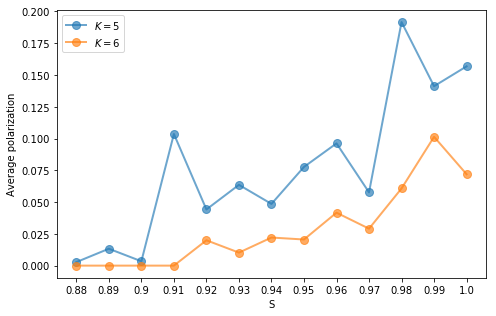

In [15]:
plot_S_K_experiment('data/ic_k56', figsize=(7, 4.5))

And on to the medians...

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]), <a list of 25 Text xticklabel objects>)


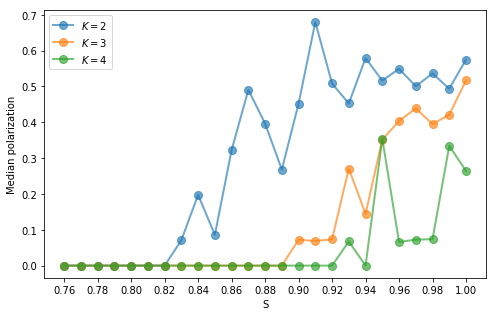

In [38]:
plot_S_K_experiment('data/ic_k234', figsize=(7, 4.5), agg_fun=np.median, plot_start=1)
plt.xticks(plt.xticks()[0][::2], 
           ['{:.2f}'.format(el) for el in np.arange(.76, 1.03, .02)]);

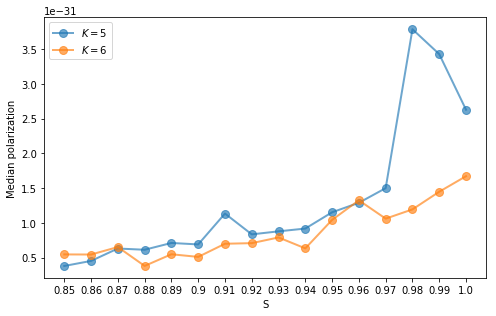

In [20]:
plot_S_K_experiment('data/ic_k56', figsize=(7, 4.5), agg_fun=np.median)

We need to take a closer look at when polarization does emerge for these parameterizations. Where could randomness in final polarization come from? The first thought would be to check the random graph structure. Perhaps in higher dimensions, there are fewer configurations.

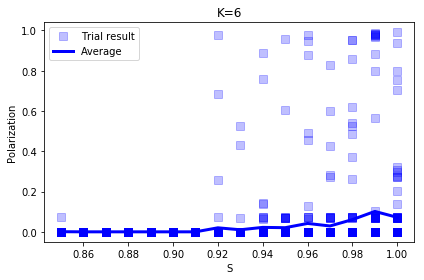

In [92]:
from complexity_analysis import (
    _all_final_polarizations, _final_mean
)

# Get HDFs for all S and a single K
K = 6
hdfs = _hdf_list('data/ic_k56')
hdfs_K = [hdf for hdf in hdfs if hdf.attrs['K'] == K]
hdfs_K.sort(key=lambda x: x.attrs['S'])
hdf0 = hdfs_K[0]
n_trials = len(_all_final_polarizations(hdf0))
S_vals = [hdf.attrs['S'] for hdf in hdfs_K]
for idx, hdf in enumerate(hdfs_K):
    if idx == 0:
        plt.plot([S_vals[idx]]*n_trials, _all_final_polarizations(hdf), 
                     's', color='blue', ms=8, alpha=0.25,
                label='Trial result')
    else:
        plt.plot([S_vals[idx]]*n_trials, _all_final_polarizations(hdf), 
                     's', color='blue', ms=8, alpha=0.25)

means = [_final_mean(hdf) for hdf in hdfs_K]    

plt.plot(S_vals, means, color='blue', marker=None, lw=3, label='Average')
plt.ylabel('Polarization')
plt.xlabel('S')
plt.legend()
plt.title('K=6');

Now try a semilog y-axis to see clustering of runs a little better.

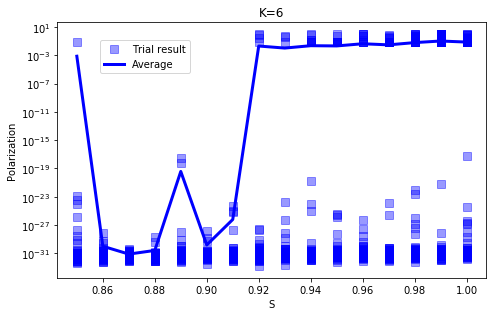

In [91]:
plt.figure(figsize=(7, 4.5))
for idx, hdf in enumerate(hdfs_K):
    if idx == 0:
        plt.semilogy([S_vals[idx]]*n_trials, _all_final_polarizations(hdf), 
                     's', color='blue', ms=8, alpha=0.4,
                label='Trial result')
    else:
        plt.semilogy([S_vals[idx]]*n_trials, _all_final_polarizations(hdf), 
                     's', color='blue', ms=8, alpha=0.4)

means = [_final_mean(hdf) for hdf in hdfs_K]    

plt.semilogy(S_vals, means, color='blue', marker=None, lw=3, label='Average')
plt.ylabel('Polarization')
plt.xlabel('S')
plt.legend(loc=(.1, .8))
plt.title('K=6');

Both of these are interesting. Wrap them up in a function that can plot either one or many for different values of $K$ in separate subplots. Have a switch to specify the `plot_fun`.

This is now done in `plot_single_S_K`, shown below.

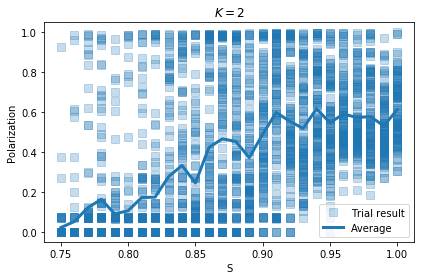

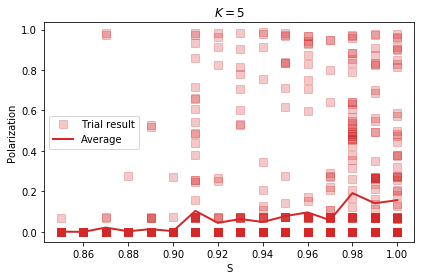

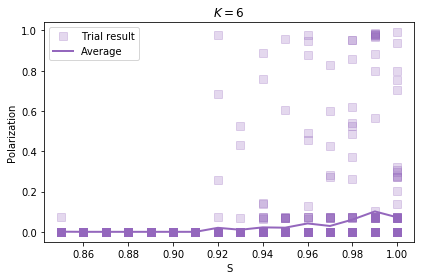

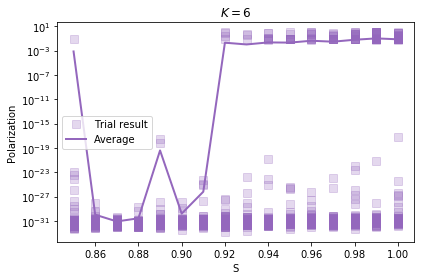

In [97]:
from complexity_analysis import plot_single_S_K

plot_single_S_K('data/ic_k234', 2, lw=3)
plot_single_S_K('data/ic_k56', 5)
plot_single_S_K('data/ic_k56', 6)
plot_single_S_K('data/ic_k56', 6, semilogy=True)
# Uncomment to save one of these to file test.pdf
# plot_single_S_K('data/ic_k56', 6, save_path='test.pdf')

Seems to be working well. We want to analyze the variation between runs. However, it'd be good to look at P vs. S for all trials even if they don't have the same number of data points on the x-axis. $K=2,3$ and $4$ all went from .75 to 1.0, but $K=5,6$ start from $S=.85$.

Let's try to get that working.

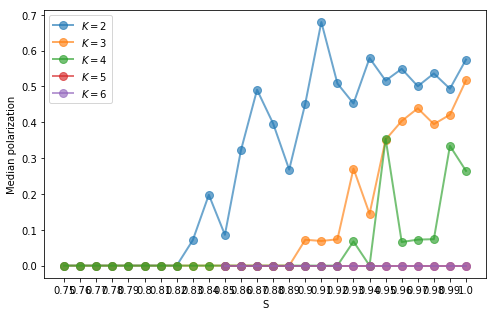

In [101]:
plot_S_K_experiment(['data/ic_k234', 'data/ic_k56'], figsize=(7, 4.5), agg_fun=np.median)

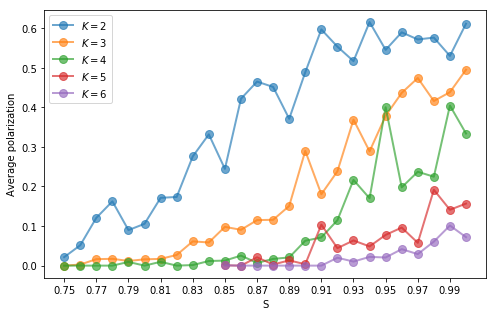

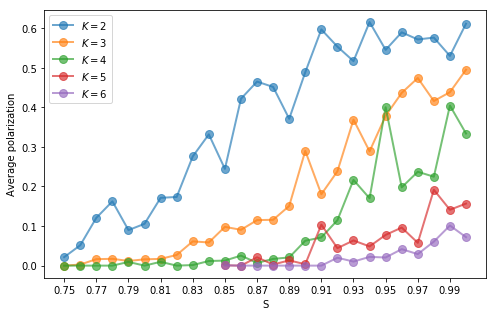

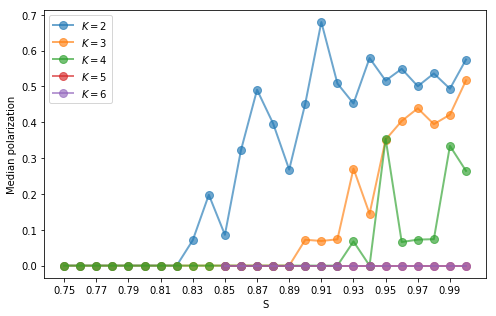

In [113]:
plot_S_K_experiment(['data/ic_k234', 'data/ic_k56'], figsize=(7, 4.5), 
                    agg_fun=np.mean, lim_xticks=True)
# Uncomment below to persist figures
plot_S_K_experiment(['data/ic_k234', 'data/ic_k56'], figsize=(7, 4.5), lim_xticks=True,
                    agg_fun=np.mean, save_path='reports/Figures/s_k_zoom_2-6_mean.pdf')
plot_S_K_experiment(['data/ic_k234', 'data/ic_k56'], figsize=(7, 4.5), agg_fun=np.median, 
                    lim_xticks=True, save_path='reports/Figures/s_k_zoom_2-6_median.pdf')